In [87]:
# Importing libraries
import pandas as pd
import numpy as np
import math
import operator
import os
from pandas import DataFrame
from pandas import Series
import statsmodels #FOR NEXT STEP -- RUNNING REGRESSIONS 
import statsmodels.api as sm
import statsmodels.formula.api as smf   #FOR USING 'R'-STYLE FORMULAS FOR REGRESSIONS
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt


In [40]:
os.chdir("/Users/cyrusmuriithi/Desktop/")

In [41]:
os.getcwd()

'/Users/cyrusmuriithi/Desktop'

In [44]:
#os.listdir('G:\\')

In [45]:
def foo(a,b):
    if a==b:
        return(a+b)*2
    else:
        return(a+b)

In [46]:
x= foo(1,3)
y= foo(2,2)

In [47]:
print(x,y)

(4, 8)


In [48]:
wins = 0
while (wins < 10):
    print("Does not make playoffs")
    wins = wins + 1

Does not make playoffs
Does not make playoffs
Does not make playoffs
Does not make playoffs
Does not make playoffs
Does not make playoffs
Does not make playoffs
Does not make playoffs
Does not make playoffs
Does not make playoffs


In [49]:
winz = 0
while (winz <= 10):
    if (winz < 10):
        print("does not make playoffs")
    else :
        print ("makes playoffs")
    winz = winz + 1

does not make playoffs
does not make playoffs
does not make playoffs
does not make playoffs
does not make playoffs
does not make playoffs
does not make playoffs
does not make playoffs
does not make playoffs
does not make playoffs
makes playoffs


In [50]:
mydata= pd.read_csv("./Discriminant Analysis/wdbc.csv")

In [51]:
mydata.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [52]:
cnames= ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean",
          "concavity_mean","concave_points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se",
          "perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave_points_se","symmetry_se",
          "fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
          "compactness_worst","concavity_worst","concave_points_worst","symmetry_worst","fractal_dimension_worst"]

mydata.columns = cnames

In [53]:
mydata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [34]:
mydata.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [54]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

In [55]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [56]:
print pd.__version__
print statsmodels.__version__

0.23.4
0.9.0


In [58]:
mydata.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave_points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave_points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave_points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [59]:
mydata.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [61]:
print len(mydata)

568


In [63]:
print len(mydata.columns)

32


In [64]:
#Summary stats
mydata.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00
mean,30423820.04,14.12,19.31,91.91,654.28,0.10,0.10,0.09,0.05,0.18,0.06,0.40,1.22,2.86,40.14,0.01,0.03,0.03,0.01,0.02,0.00,16.25,25.69,107.13,878.58,0.13,0.25,0.27,0.11,0.29,0.08
std,125124628.31,3.52,4.29,24.29,351.92,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.01,45.28,0.00,0.02,0.03,0.01,0.01,0.00,4.82,6.14,33.47,567.85,0.02,0.16,0.21,0.07,0.06,0.02
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,869222.50,11.70,16.18,75.13,420.18,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.60,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.09,84.10,514.97,0.12,0.15,0.11,0.06,0.25,0.07
50%,906157.00,13.36,18.86,86.21,548.75,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.48,0.01,0.02,0.03,0.01,0.02,0.00,14.96,25.43,97.66,685.55,0.13,0.21,0.23,0.10,0.28,0.08
75%,8825022.25,15.78,21.80,103.88,782.62,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.34,45.02,0.01,0.03,0.04,0.01,0.02,0.00,18.77,29.76,125.17,1073.50,0.15,0.34,0.38,0.16,0.32,0.09
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [65]:
np.round(mydata.describe(), 2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00
mean,30423820.04,14.12,19.31,91.91,654.28,0.10,0.10,0.09,0.05,0.18,0.06,0.40,1.22,2.86,40.14,0.01,0.03,0.03,0.01,0.02,0.00,16.25,25.69,107.13,878.58,0.13,0.25,0.27,0.11,0.29,0.08
std,125124628.31,3.52,4.29,24.29,351.92,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.01,45.28,0.00,0.02,0.03,0.01,0.01,0.00,4.82,6.14,33.47,567.85,0.02,0.16,0.21,0.07,0.06,0.02
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,869222.50,11.70,16.18,75.13,420.18,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.60,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.10,84.10,514.97,0.12,0.15,0.11,0.06,0.25,0.07
50%,906157.00,13.36,18.86,86.21,548.75,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.48,0.01,0.02,0.03,0.01,0.02,0.00,14.96,25.42,97.66,685.55,0.13,0.21,0.23,0.10,0.28,0.08
75%,8825022.25,15.78,21.80,103.88,782.62,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.34,45.02,0.01,0.03,0.04,0.01,0.02,0.00,18.77,29.76,125.17,1073.50,0.15,0.34,0.38,0.16,0.32,0.09
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [66]:
#Transpose the summary stats
np.round(mydata.describe(), 1).T

,count,mean,std,min,25%,50%,75%,max
id,568.00,30423820.04,125124628.31,8670.00,869222.50,906157.00,8825022.25,911320502.00
radius_mean,568.00,14.12,3.52,6.98,11.70,13.36,15.78,28.11
texture_mean,568.00,19.31,4.29,9.71,16.18,18.86,21.80,39.28
perimeter_mean,568.00,91.91,24.29,43.79,75.13,86.21,103.88,188.50
area_mean,568.00,654.28,351.92,143.50,420.18,548.75,782.62,2501.00
smoothness_mean,568.00,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,568.00,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,568.00,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave_points_mean,568.00,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,568.00,0.18,0.03,0.11,0.16,0.18,0.20,0.30


In [67]:
np.round(mydata.describe(), 1).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
id,568.00,30423820.00,125124628.30,8670.00,911320502.00
radius_mean,568.00,14.10,3.50,7.00,28.10
texture_mean,568.00,19.30,4.30,9.70,39.30
perimeter_mean,568.00,91.90,24.30,43.80,188.50
area_mean,568.00,654.30,351.90,143.50,2501.00
smoothness_mean,568.00,0.10,0.00,0.10,0.20
compactness_mean,568.00,0.10,0.10,0.00,0.30
concavity_mean,568.00,0.10,0.10,0.00,0.40
concave_points_mean,568.00,0.00,0.00,0.00,0.20
symmetry_mean,568.00,0.20,0.00,0.10,0.30


In [69]:
#ALTERNATIVE WAY OF WRITING
np.round(mydata.describe(), 1).transpose()

,count,mean,std,min,25%,50%,75%,max
id,568.00,30423820.00,125124628.30,8670.00,869222.50,906157.00,8825022.20,911320502.00
radius_mean,568.00,14.10,3.50,7.00,11.70,13.40,15.80,28.10
texture_mean,568.00,19.30,4.30,9.70,16.20,18.90,21.80,39.30
perimeter_mean,568.00,91.90,24.30,43.80,75.10,86.20,103.90,188.50
area_mean,568.00,654.30,351.90,143.50,420.20,548.80,782.60,2501.00
smoothness_mean,568.00,0.10,0.00,0.10,0.10,0.10,0.10,0.20
compactness_mean,568.00,0.10,0.10,0.00,0.10,0.10,0.10,0.30
concavity_mean,568.00,0.10,0.10,0.00,0.00,0.10,0.10,0.40
concave_points_mean,568.00,0.00,0.00,0.00,0.00,0.00,0.10,0.20
symmetry_mean,568.00,0.20,0.00,0.10,0.20,0.20,0.20,0.30


In [70]:
#WITH FOUR DECIMAL PLACES (DEFAULT) Save Table to csv
mydata.describe().transpose().to_csv('summary stats.csv', sep=',')

In [71]:
mydata.describe().transpose()[['count','mean', 'std', 'min', 'max']].to_csv('summary stats2.csv', sep=',')

In [72]:
#WITH TWO DECIMAL PLACES
np.round(mydata.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_csv('summary stats3.csv', sep=',')

In [73]:
cols = ['radius_mean','radius_se','radius_worst']
np.round(mydata[cols].describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_csv('summary stats (partial).csv', sep=',')

In [74]:
mydata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
id                         568 non-null int64
diagnosis                  568 non-null object
radius_mean                568 non-null float64
texture_mean               568 non-null float64
perimeter_mean             568 non-null float64
area_mean                  568 non-null float64
smoothness_mean            568 non-null float64
compactness_mean           568 non-null float64
concavity_mean             568 non-null float64
concave_points_mean        568 non-null float64
symmetry_mean              568 non-null float64
fractal_dimension_mean     568 non-null float64
radius_se                  568 non-null float64
texture_se                 568 non-null float64
perimeter_se               568 non-null float64
area_se                    568 non-null float64
smoothness_se              568 non-null float64
compactness_se             568 non-null float64
concavity_se               568 non

In [75]:
mydata.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [76]:
data_crosstab = pd.crosstab(mydata['radius_mean'], 
                            mydata['radius_worst'],  
                               margins = False) 
print(data_crosstab) 

radius_worst  7.93   8.68   8.95   8.96   9.08   9.09   9.26   9.41   9.46   \
radius_mean                                                                   
6.98              1      0      0      0      0      0      0      0      0   
7.69              0      1      0      0      0      0      0      0      0   
7.73              0      0      0      0      1      0      0      0      0   
7.76              0      0      0      0      0      0      0      0      1   
8.20              0      0      0      1      0      0      0      0      0   
8.22              0      0      0      0      0      1      0      0      0   
8.57              0      0      0      0      0      0      0      0      0   
8.60              0      0      1      0      0      0      0      0      0   
8.60              0      0      0      0      0      0      0      0      0   
8.62              0      0      0      0      0      0      0      0      0   
8.67              0      0      0      0      0     

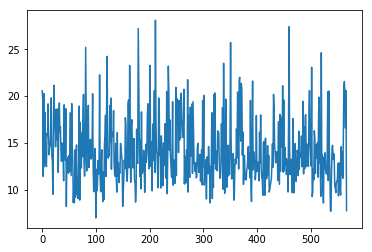

In [83]:
mydata['radius_mean'].plot()

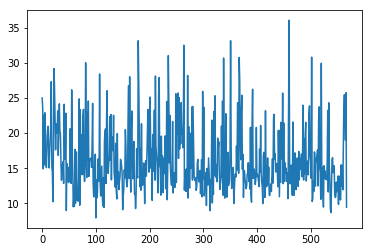

In [84]:
mydata['radius_worst'].plot()

Text(0,0.5,'Perimeter Count')

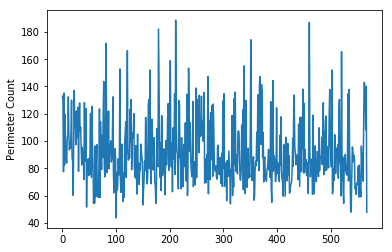

In [89]:
mydata['perimeter_mean'].plot()
plt.ylabel('Perimeter Count')

In [99]:
newdf= pd.read_csv('Mroz.csv')

In [100]:
newdf.head(10)

,Unnamed: 0,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,1,no,1610,1,0,32,12,3.35,2.65,2708,34,12,4.03,16310,12,7,5.00,no,14
1,2,no,1656,0,2,30,12,1.39,2.65,2310,30,9,8.44,21800,7,7,11.00,yes,5
2,3,no,1980,1,3,35,12,4.55,4.04,3072,40,12,3.58,21040,12,7,5.00,no,15
3,4,no,456,0,3,34,12,1.10,3.25,1920,53,10,3.54,7300,7,7,5.00,no,6
4,5,no,1568,1,2,31,14,4.59,3.60,2000,32,12,10.00,27300,12,14,9.50,yes,7
5,6,no,2032,0,0,54,12,4.74,4.70,1040,57,11,6.71,19495,14,7,7.50,yes,33
6,7,no,1440,0,2,37,16,8.33,5.95,2670,37,12,3.43,21152,14,7,5.00,no,11
7,8,no,1020,0,0,54,12,7.84,9.98,4120,53,8,2.55,18900,3,3,5.00,no,35
8,9,no,1458,0,2,48,12,2.13,0.00,1995,52,4,4.22,20405,7,7,3.00,no,24
9,10,no,1600,0,2,39,12,4.69,4.15,2100,43,12,5.71,20425,7,7,5.00,no,21


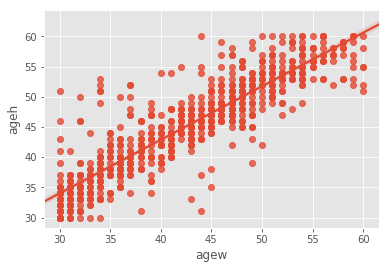

In [101]:
# use the function regplot to make a scatterplot
sb.regplot(x=newdf["agew"], y=newdf["ageh"])
#sns.plt.show()

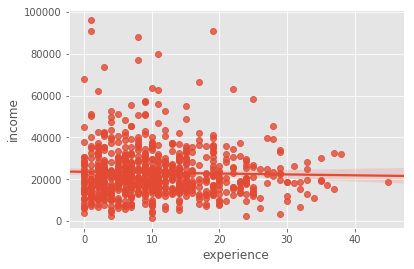

In [104]:
sb.regplot(x=newdf["experience"], y=newdf["income"])